# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

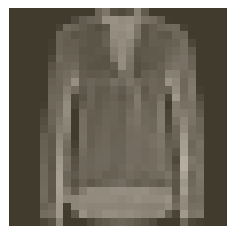

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: F_MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

With the data loaded, it's time to import the necessary packages.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
from collections import OrderedDict


input_size = 784
hidden_sizes = [512,128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[2], output_size))]))


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [7]:
# TODO: Train the network here
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

In [8]:
labels

tensor([ 8,  5,  3,  9,  7,  0,  5,  6,  2,  9,  7,  6,  8,  9,
         7,  3,  8,  4,  9,  9,  4,  0,  8,  9,  5,  5,  2,  8,
         9,  1,  5,  6,  5,  5,  6,  5,  8,  8,  9,  5,  8,  6,
         6,  8,  7,  1,  1,  2,  4,  2,  8,  5,  5,  5,  3,  3,
         6,  7,  7,  7,  7,  4,  7,  9])

In [9]:
np.shape(images)

torch.Size([64, 784])

In [10]:
# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()

Gradient - tensor(1.00000e-03 *
       [[-0.2285, -0.2285, -0.2285,  ..., -0.2285, -0.2285, -0.2285],
        [ 0.0771,  0.0771,  0.0771,  ...,  0.1138,  0.0713,  0.0770],
        [-0.2264, -0.2264, -0.2264,  ..., -0.2254, -0.2241, -0.2264],
        ...,
        [-0.2672, -0.2672, -0.2672,  ..., -0.2778, -0.2829, -0.2672],
        [-0.4093, -0.4093, -0.4093,  ..., -0.4093, -0.4043, -0.4093],
        [ 1.4427,  1.4427,  1.4416,  ...,  1.4552,  1.4868,  1.4412]])


In [11]:
labels.size()

torch.Size([64])

In [12]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
img = images[0].view(1, 784)

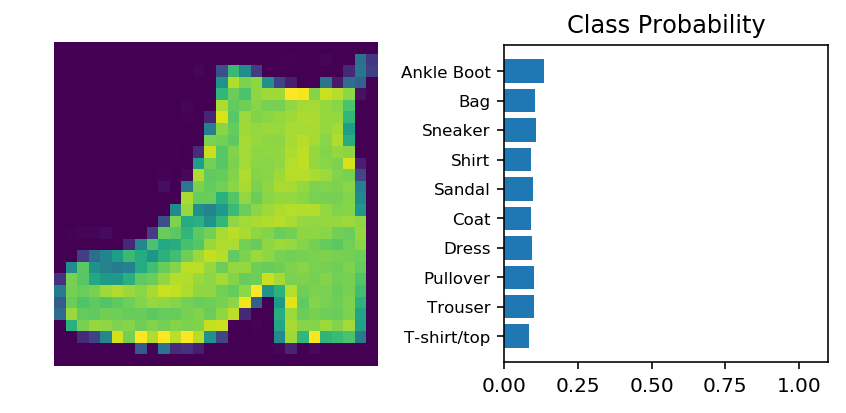

In [13]:
# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [14]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 1.2348
Epoch: 1/3...  Loss: 0.6724
Epoch: 1/3...  Loss: 0.6345
Epoch: 1/3...  Loss: 0.5698
Epoch: 1/3...  Loss: 0.5281
Epoch: 1/3...  Loss: 0.5466
Epoch: 1/3...  Loss: 0.4859
Epoch: 1/3...  Loss: 0.4860
Epoch: 1/3...  Loss: 0.4620
Epoch: 1/3...  Loss: 0.4579
Epoch: 1/3...  Loss: 0.4679
Epoch: 1/3...  Loss: 0.4817
Epoch: 1/3...  Loss: 0.4339
Epoch: 1/3...  Loss: 0.4844
Epoch: 1/3...  Loss: 0.4487
Epoch: 1/3...  Loss: 0.4461
Epoch: 1/3...  Loss: 0.4078
Epoch: 1/3...  Loss: 0.4246
Epoch: 1/3...  Loss: 0.4336
Epoch: 1/3...  Loss: 0.4001
Epoch: 1/3...  Loss: 0.4196
Epoch: 1/3...  Loss: 0.4099
Epoch: 1/3...  Loss: 0.4058
Epoch: 2/3...  Loss: 0.2061
Epoch: 2/3...  Loss: 0.3968
Epoch: 2/3...  Loss: 0.3850
Epoch: 2/3...  Loss: 0.3796
Epoch: 2/3...  Loss: 0.3746
Epoch: 2/3...  Loss: 0.3853
Epoch: 2/3...  Loss: 0.4053
Epoch: 2/3...  Loss: 0.3478
Epoch: 2/3...  Loss: 0.3398
Epoch: 2/3...  Loss: 0.3620
Epoch: 2/3...  Loss: 0.3557
Epoch: 2/3...  Loss: 0.3826
Epoch: 2/3...  Loss:

In [17]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
img = images[0].view(1, 784)

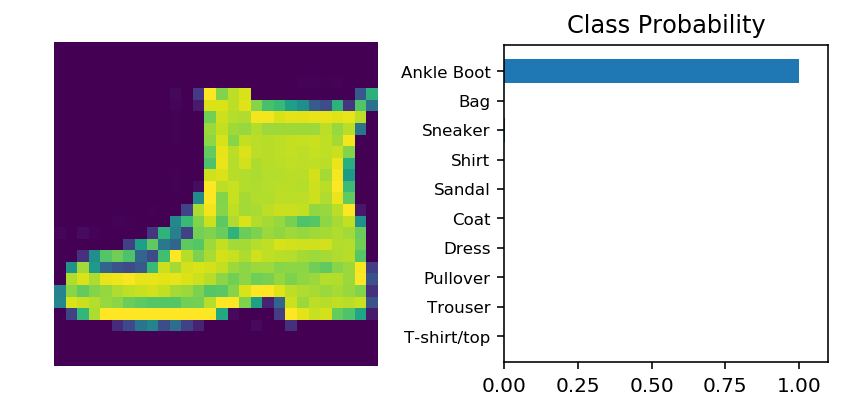

In [18]:
# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.

In [ ]:
PATH = !pwd

In [48]:
torch.save(model.state_dict(), PATH[0]+"fashion.tp")